## Hierarchical Clustering

Прежде, чем приступить к выделению кластеров, давайте разберём зачем это надо. Напомню, что мы работаем с датасетом торговых точек, где каждый объект имеет ряд характеристик (уровень успешности, площадь, количество сотрудников и тд). Целью последующего анализа является определение групп (кластеров) торговых точек по определённым вариантивным признакам. Эти группы могут быть использованы для других рейтингов, анализа рынка торговли, инвестиционной привлекательности и т.д. Предлагаю преступить к работе.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Nikiforova_prep.csv', sep=';')
df

,square,type,reviews,cars_per_day,average_income_of_customers,road,place_for_walk,coating_quality,spontaneous_trade,place_for_picnic,success
0,9.00,1,42.820513,12679.0,14910.0,0.0,0.0,0.0,0.0,0.0,0
1,30.00,1,8.000000,12800.0,9030.0,0.0,0.0,0.0,0.0,0.0,0
2,15.00,1,42.820513,77106.0,9030.0,0.0,0.0,0.0,0.0,0.0,0
3,20.00,1,42.820513,0.0,13930.0,0.0,0.0,0.0,0.0,0.0,0
4,30.00,0,42.820513,0.0,14560.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
59,30.00,1,25.000000,8771.0,11130.0,1.0,1.0,0.0,0.0,0.0,0
60,51.77,1,4.000000,146.0,9800.0,1.0,0.0,0.0,0.0,0.0,1
61,27.26,1,3.000000,6661.0,12600.0,0.0,0.0,0.0,0.0,0.0,1
62,50.93,0,17.000000,0.0,12460.0,0.0,0.0,0.0,0.0,0.0,0


Прошкалируем наши данные.

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['square','type','reviews','cars_per_day','average_income_of_customers','road','place_for_walk','coating_quality','spontaneous_trade','place_for_picnic','success']).round()

Выводим корреляционную матрицу. Она нам пригодится позже для выявления переменных, которые оставим для кластеризации.

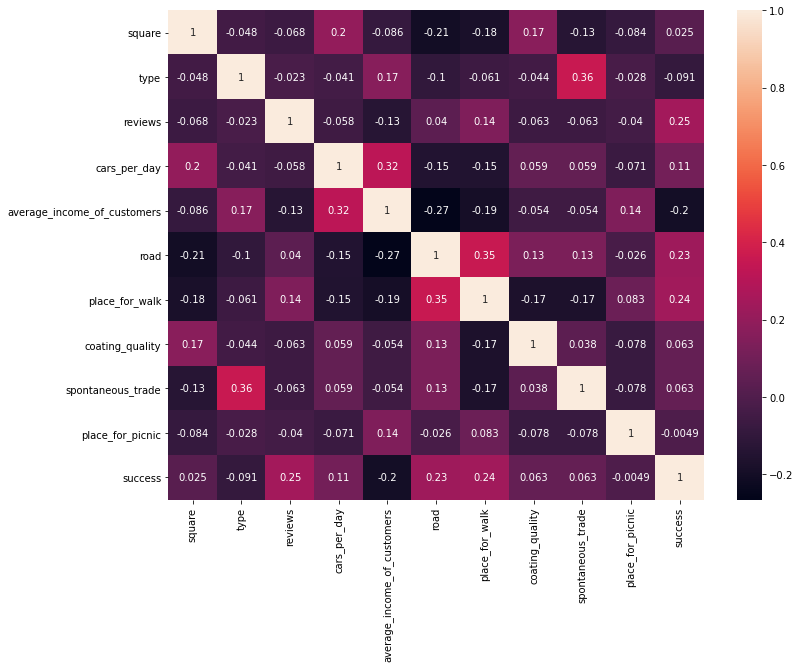

In [4]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Для определения оптимального количества кластеров построим дендрограмму. Чтобы сделать разделение более интересным для интерпретации, принимаем решение, что будет делать разбиение на 3 и 5 кластеров, а потом сравним.

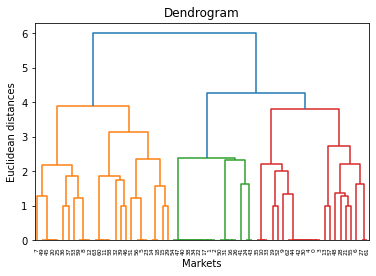

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Markets')
plt.ylabel('Euclidean distances')
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering
allhc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)
allhc3

array([1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 2, 1, 2,
       1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [7]:
from sklearn.cluster import AgglomerativeClustering
allhc5 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(df)
allhc5

array([4, 2, 2, 4, 4, 0, 1, 3, 3, 4, 4, 0, 3, 1, 0, 0, 2, 2, 0, 4, 3, 1,
       2, 0, 2, 3, 2, 1, 1, 0, 4, 2, 0, 4, 2, 4, 3, 3, 2, 0, 2, 2, 4, 2,
       4, 3, 0, 2, 1, 3, 2, 0, 4, 3, 2, 1, 0, 1, 0, 3, 0, 1, 4, 0],
      dtype=int64)

Уменьшим количество переменных, оставив только значимые. Отталкиваемся от корреляционной матрицы и значимых переменных, которые использовались при исследовании ранее. Таким образом, оставляем square, type, reviews, cars_per_day, average_income_of_customers, road, place_for_picnic.

In [8]:
X = df.iloc[:, [0,1,2,3,4,5,9]]

Теперь строим дендрограмму с использованием только значимых переменных. Видим, что сейчас логичнее выделять 3 кластера.

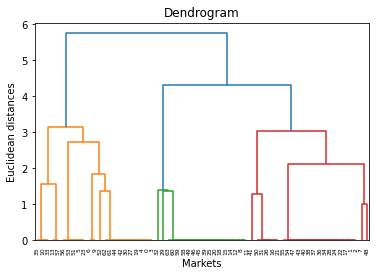

In [9]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Markets')
plt.ylabel('Euclidean distances')
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(X)

Для сравнения в будущем сделаем ещё такой вариант.

In [11]:
Y = df.iloc[:, [0,4,5,9]]

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc_var = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(Y)

In [13]:
import pickle
obj = {'hc3': hc3,'allhc3': allhc3,'allhc5': allhc5,'hc_var': hc_var}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()